# Estadísticas de la covid-19 en España desde el 1 de enero de 2020 hasta el 27 de septiembre de 2021.
## Fecha de Creación: 29/07/2021
## Fecha de modificación 27/09/2021

En el presente documento se extraen los datos de la afectación del virus SARS-CoV2 causante de la enfermedad covid-19 en España desde el 1 de Enero de 2020 al 27 de septiembre de 2021. Los datos se han obtenido del [**Centro Nacional de Epidemiología**](https://cnecovid.isciii.es) de España.

Vamos a analizar los datos usando el lenguaje de programación *Python*. Para ello comenzamos importando la librería ```pandas```.

In [1]:
import pandas as pd

Los datos a analizar contienen los números de casos registrados de covid-19, números de hospitalizados, ingresos en UCI y defunciones por covid-19 clasificados por fecha, sexo, grupo de edad y provincia. Dichos datos se actualizan casi todos los días y se pueden descargar en el siguiente enlace: https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv

In [2]:
#Datos para todas las edades
url = 'https://cnecovid.isciii.es/covid19/resources/casos_hosp_uci_def_sexo_edad_provres.csv'
datos = pd.read_csv(url)

In [3]:
#Visualizamos un extracto de los datos
datos

provincia_iso sexo grupo_edad       fecha  num_casos  num_hosp  \
0                   A    H        0-9  2020-01-01          0         0   
1                   A    H      10-19  2020-01-01          0         0   
2                   A    H      20-29  2020-01-01          0         0   
3                   A    H      30-39  2020-01-01          0         0   
4                   A    H      40-49  2020-01-01          0         0   
...               ...  ...        ...         ...        ...       ...   
1004875            ZA   NC      50-59  2021-09-23          0         0   
1004876            ZA   NC      60-69  2021-09-23          0         0   
1004877            ZA   NC      70-79  2021-09-23          0         0   
1004878            ZA   NC        80+  2021-09-23          0         0   
1004879            ZA   NC         NC  2021-09-23          0         0   

         num_uci  num_def  
0              0        0  
1              0        0  
2              0        0  
3              0        0  
4              0        0  
...          ...      ...  
1004875        0        0  
1004876        0        0  
1004877        0        0  
1004878        0        0  
1004879        0        0  

[1004880 rows x 8 columns]

In [4]:
#metadatos sobre el dataframe
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004880 entries, 0 to 1004879
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   provincia_iso  985920 non-null   object
 1   sexo           1004880 non-null  object
 2   grupo_edad     1004880 non-null  object
 3   fecha          1004880 non-null  object
 4   num_casos      1004880 non-null  int64 
 5   num_hosp       1004880 non-null  int64 
 6   num_uci        1004880 non-null  int64 
 7   num_def        1004880 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 61.3+ MB


## Afectación sobre los distintos grupos de edad

Para realizar un análisis sencillo prescindimos de las columnas de las provincias, el sexo y la fecha. Así pues, vamos a crear una tabla de datos que contenga información general de la afectación sobre todos los grupos de edad y sobre el periodo de tiempo en cuestión en todo el territorio nacional.

In [5]:
#Eliminamos las columnas de provincias y sexo
df = datos.drop(['provincia_iso', 'fecha', 'sexo'], axis = 1)
df

grupo_edad  num_casos  num_hosp  num_uci  num_def
0              0-9          0         0        0        0
1            10-19          0         0        0        0
2            20-29          0         0        0        0
3            30-39          0         0        0        0
4            40-49          0         0        0        0
...            ...        ...       ...      ...      ...
1004875      50-59          0         0        0        0
1004876      60-69          0         0        0        0
1004877      70-79          0         0        0        0
1004878        80+          0         0        0        0
1004879         NC          0         0        0        0

[1004880 rows x 5 columns]

A continuación agrupamos los datos por grupo de edad y sumamos los números de casos, hospitalizaciones, ingresos en uci y número de defunciones en cada grupo.

In [6]:
df_gr = df.groupby(['grupo_edad']).sum()
df_gr

num_casos  num_hosp  num_uci  num_def
grupo_edad                                       
0-9            351276      3342      172       16
10-19          665896      4361      263       20
20-29          787154     14625      740      117
30-39          704470     26593     1938      277
40-49          780163     46547     4369      942
50-59          656703     65741     8306     3263
60-69          422926     74332    12323     8459
70-79          269956     79073    10289    18705
80+            288160    108440     1884    53994
NC              16410      1950      195      330

Añadamos una fila más a la tabla que corresponda al total de todos los grupos de edad.

In [7]:
df_gr.loc['Total'] = df_gr.sum(axis = 0)
df_gr

num_casos  num_hosp  num_uci  num_def
grupo_edad                                       
0-9            351276      3342      172       16
10-19          665896      4361      263       20
20-29          787154     14625      740      117
30-39          704470     26593     1938      277
40-49          780163     46547     4369      942
50-59          656703     65741     8306     3263
60-69          422926     74332    12323     8459
70-79          269956     79073    10289    18705
80+            288160    108440     1884    53994
NC              16410      1950      195      330
Total         4943114    425004    40479    86123

Finalmente, calculamos el porcentaje de hospitalizados, de ingresados en UCI y de fallecidos por número de casos y sobre el total de afectados en cada rango de edad y creamos una tabla con los datos obtenidos.

In [8]:
#Calculo los porcentajes por número de casos y los añado como nuevas columnas
df_gr['% de hospitalizaciones por número de casos'] = df_gr.apply(lambda df_gr: (df_gr['num_hosp'])/df_gr['num_casos']*100, axis = 1)
df_gr['% de ingresos en uci por número de casos'] = df_gr.apply(lambda df_gr: (df_gr['num_uci'])/df_gr['num_casos']*100, axis = 1)
df_gr['% de defunciones por número de casos'] = df_gr.apply(lambda df_gr: (df_gr['num_def'])/df_gr['num_casos']*100, axis = 1)

#Calculo los porcentajes por grupos de edades y los añado como nuevas columnas
num_hosp = df_gr.loc['Total', 'num_hosp']
num_uci = df_gr.loc['Total', 'num_uci']
num_def = df_gr.loc['Total', 'num_def']
df_gr['% de hospitalizaciones sobre el total de hospitalizados'] = df_gr["num_hosp"]/num_hosp*100
df_gr['% de ingresos en uci sobre el total de ingresados en uci'] = df_gr["num_uci"]/num_uci*100
df_gr['% de defunciones sobre el total de defunciones'] = df_gr["num_def"]/num_def*100

Cambiemos también los nombres de las cuatros primeras columnas para tenera una mayor claridad de los datos que hemos obtenido y visualicemos la tabla final.

In [9]:
df_gr.rename(columns = {'num_casos':'Número de casos', 'num_hosp':'Número de hospitalizaciones',
                        'num_uci': 'Número de ingresos en UCI', 'num_def': 'Número de defunciones'}, inplace = True)
df_gr

Número de casos  Número de hospitalizaciones  \
grupo_edad                                                 
0-9                  351276                         3342   
10-19                665896                         4361   
20-29                787154                        14625   
30-39                704470                        26593   
40-49                780163                        46547   
50-59                656703                        65741   
60-69                422926                        74332   
70-79                269956                        79073   
80+                  288160                       108440   
NC                    16410                         1950   
Total               4943114                       425004   

            Número de ingresos en UCI  Número de defunciones  \
grupo_edad                                                     
0-9                               172                     16   
10-19                             263                     20   
20-29                             740                    117   
30-39                            1938                    277   
40-49                            4369                    942   
50-59                            8306                   3263   
60-69                           12323                   8459   
70-79                           10289                  18705   
80+                              1884                  53994   
NC                                195                    330   
Total                           40479                  86123   

            % de hospitalizaciones por número de casos  \
grupo_edad                                               
0-9                                           0.951389   
10-19                                         0.654907   
20-29                                         1.857959   
30-39                                         3.774895   
40-49                                         5.966317   
50-59                                        10.010766   
60-69                                        17.575652   
70-79                                        29.291070   
80+                                          37.631871   
NC                                           11.882998   
Total                                         8.597900   

            % de ingresos en uci por número de casos  \
grupo_edad                                             
0-9                                         0.048964   
10-19                                       0.039496   
20-29                                       0.094010   
30-39                                       0.275100   
40-49                                       0.560011   
50-59                                       1.264803   
60-69                                       2.913749   
70-79                                       3.811362   
80+                                         0.653803   
NC                                          1.188300   
Total                                       0.818897   

            % de defunciones por número de casos  \
grupo_edad                                         
0-9                                     0.004555   
10-19                                   0.003003   
20-29                                   0.014864   
30-39                                   0.039320   
40-49                                   0.120744   
50-59                                   0.496876   
60-69                                   2.000113   
70-79                                   6.928907   
80+                                    18.737507   
NC                                      2.010969   
Total                                   1.742282   

            % de hospitalizaciones sobre el total de hospitalizados  \
grupo_edad                                                            
0-9                                                  0.786346         
10-19                   

Veamos en un gráfico de barras los datos de las cuatro primeras columnas de la tabla anterior (prescindimos de la fila "Total").

In [10]:
#%matplotlib inline
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#
#mpl.style.use(['ggplot'])

In [11]:
##Dinujamos con matplotlib
#df_gr[['Número de casos', 'Número de hospitalizaciones', 
#       'Número de ingresos en UCI', 'Número de defunciones']].drop('Total', axis = 0).plot(kind = 'barh', figsize =  (18, 14))
#plt.title('')
#plt.xlabel('Número de personas')
#plt.ylabel('Grupo de edad')
#plt.show()

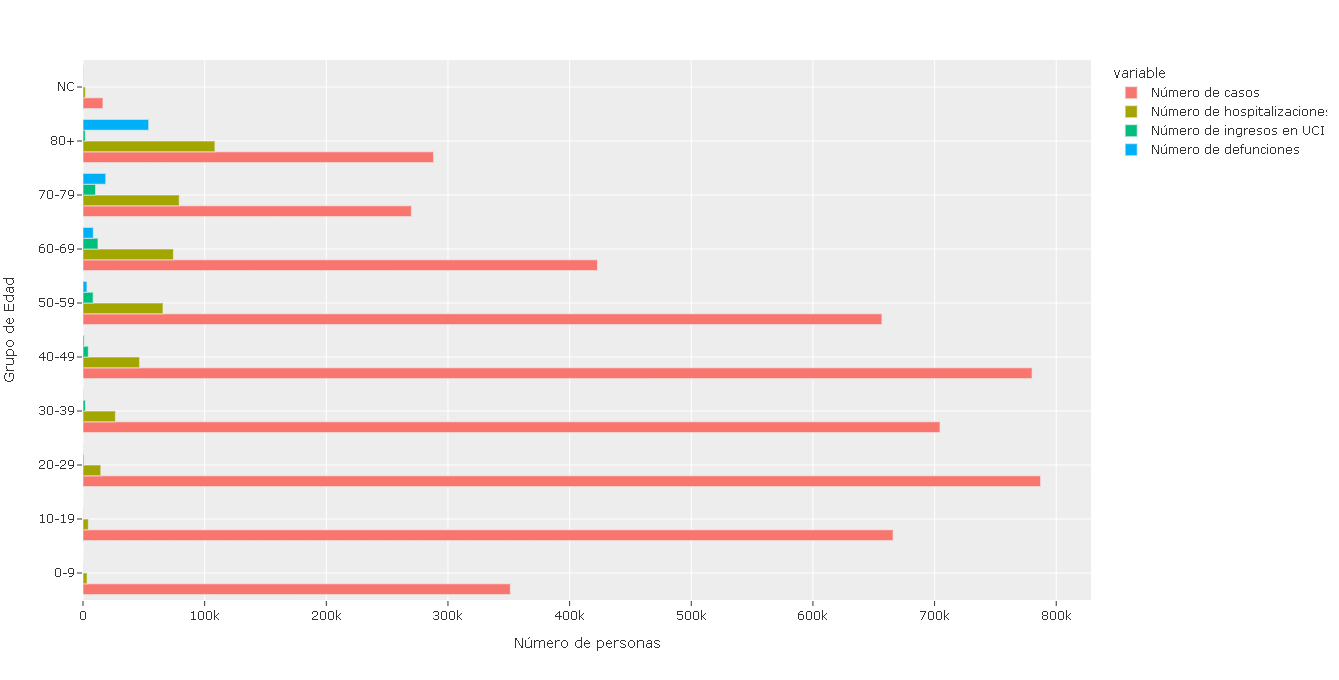

In [12]:
#Dibujamos con plotly
df_gr_bar = df_gr[['Número de casos', 'Número de hospitalizaciones', 
       'Número de ingresos en UCI', 'Número de defunciones']].drop('Total', axis = 0)
import plotly.express as px
px.bar(df_gr_bar, orientation = 'h', height = 680, barmode = 'group', 
       labels = {'grupo_edad': 'Grupo de Edad', 'value': 'Número de personas'}, template = 'ggplot2')                                             

## Evolución temporal de la efectación

Hagamos ahora unas series temporales agrupando los datos por fecha.

In [13]:
#Agrupo y sumo
df_fc = datos.groupby('fecha').sum()
#cambio el nombre de las columnas
df_fc.rename(columns = {'num_casos':'Número de casos', 'num_hosp':'Número de hospitalizaciones',
                        'num_uci': 'Número de ingresos en UCI', 'num_def': 'Número de defunciones'}, inplace = True)
#Visualizo los datos
df_fc

Número de casos  Número de hospitalizaciones  \
fecha                                                      
2020-01-01                0                            8   
2020-01-02                0                           68   
2020-01-03                0                           11   
2020-01-04                0                           11   
2020-01-05                0                           11   
...                     ...                          ...   
2021-09-19              874                           96   
2021-09-20             2225                          122   
2021-09-21             2055                           90   
2021-09-22             1056                           42   
2021-09-23                7                            0   

            Número de ingresos en UCI  Número de defunciones  
fecha                                                         
2020-01-01                          0                      0  
2020-01-02                          1                      0  
2020-01-03                          1                      0  
2020-01-04                          0                      0  
2020-01-05                          0                      0  
...                               ...                    ...  
2021-09-19                          8                     32  
2021-09-20                          7                     24  
2021-09-21                         11                     20  
2021-09-22                          5                     12  
2021-09-23                          0                      1  

[632 rows x 4 columns]

Pasamos las fechas del formato ``string`` al formato ``datetime``.

In [14]:
df_fc.index = pd.to_datetime(df_fc.index, format = '%Y/%m/%d')

Dibujamos una serie temporal de los datos.

In [15]:
##Dibujamos con matplotlib
#df_fc.plot(kind = 'area', figsize = (18,10), stacked = False, alpha = 0.35)
#
#plt.title('Datos registrados de la evolución de la Covid-19 en España desde el 01/01/2020 hasta el 23/09/2021')
#plt.xlabel('Fecha')
#plt.ylabel('Número de personas')
#plt.show()

In [16]:
df_fc.reset_index(inplace = True)

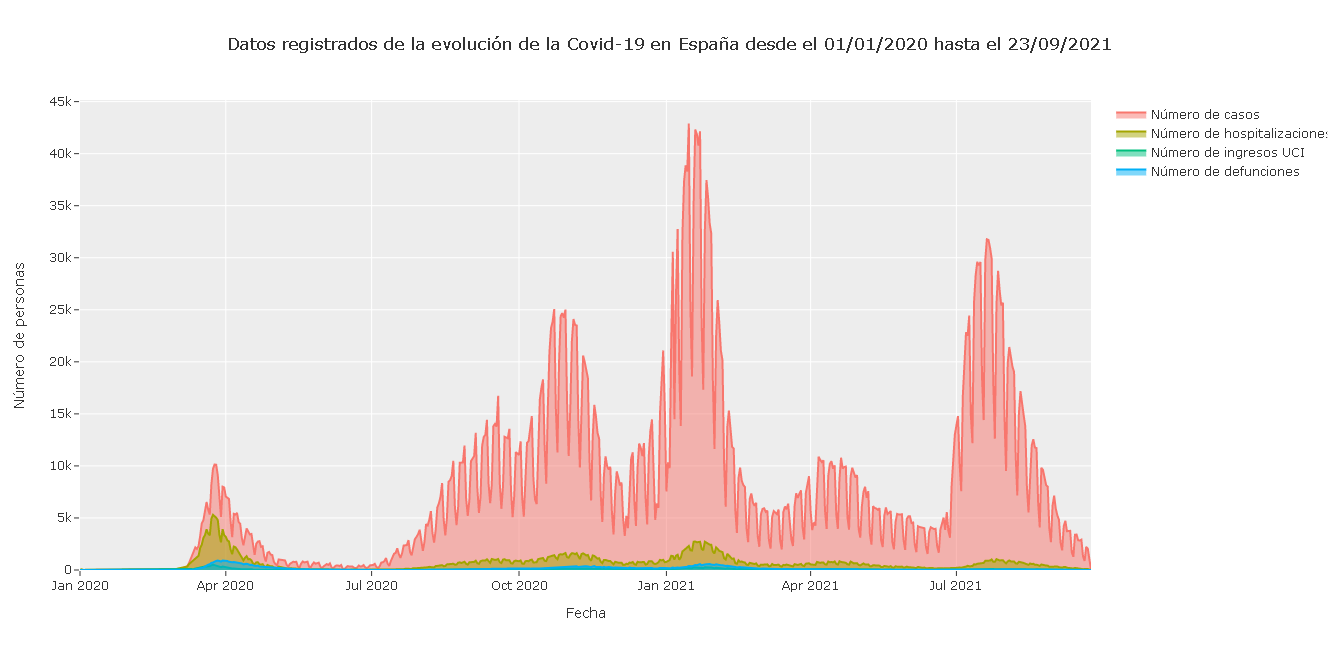

In [17]:
import plotly.graph_objects as go
fig = go.Figure()
fig.update_layout(height = 650, template = 'ggplot2', 
                  title = 'Datos registrados de la evolución de la Covid-19 en España desde el 01/01/2020 hasta el 23/09/2021',
                  yaxis = dict(title_text = 'Número de personas'), xaxis = dict(title_text = 'Fecha'))
fig.add_trace(go.Scatter(x = df_fc['fecha'], y = df_fc['Número de casos'], fill = 'tozeroy', 
                         name = 'Número de casos'))
fig.add_trace(go.Scatter(x = df_fc['fecha'], y = df_fc['Número de hospitalizaciones'], fill = 'tozeroy',
                        name = 'Número de hospitalizaciones'))
fig.add_trace(go.Scatter(x = df_fc['fecha'], y = df_fc['Número de ingresos en UCI'], fill = 'tozeroy',
                        name = 'Número de ingresos UCI'))
fig.add_trace(go.Scatter(x = df_fc['fecha'], y = df_fc['Número de defunciones'], fill = 'tozeroy',
                        name = 'Número de defunciones'))

Veamos las gráficas del número de ingresos en UCI y de defunciones por separado.

In [18]:
##Dibujamos con matplotlib
#df_fc.drop(['Número de casos', 'Número de hospitalizaciones'], axis = 1).plot(kind = 'area', stacked = True, 
#                                                     alpha = 0.35, figsize = (18,10), color = ('darkslateblue','mediumseagreen'))
#
#plt.title('Evolución temporal de los Ingresos en UCI y defunciones por Covid-19 en España')
#plt.xlabel('Fecha')
#plt.ylabel('Número de personas')
#plt.show()

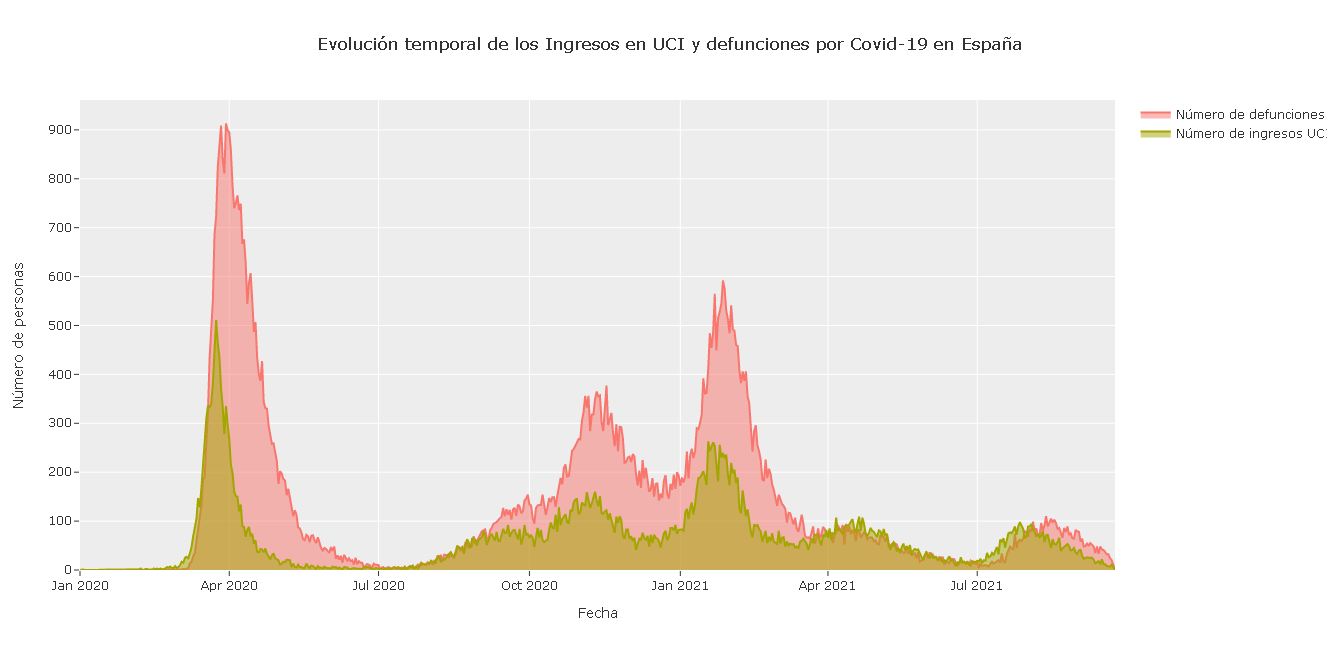

In [19]:
#Dibujamos con plotly
fig2 = go.Figure()
fig2.update_layout(height = 650, template = 'ggplot2', 
                  title = 'Evolución temporal de los Ingresos en UCI y defunciones por Covid-19 en España',
                  xaxis = dict(title_text = 'Fecha'), yaxis = dict(title_text = 'Número de personas'))
fig2.add_trace(go.Scatter(x = df_fc['fecha'], y = df_fc['Número de defunciones'], fill = 'tozeroy',
                         name = 'Número de defunciones'))
fig2.add_trace(go.Scatter(x = df_fc['fecha'], y = df_fc['Número de ingresos en UCI'], fill = 'tozeroy',
                         name = 'Número de ingresos UCI'))

## Análisis por provincias

Agrupamos los datos iniciales por provincias.

In [20]:
datos.head()

provincia_iso sexo grupo_edad       fecha  num_casos  num_hosp  num_uci  \
0             A    H        0-9  2020-01-01          0         0        0   
1             A    H      10-19  2020-01-01          0         0        0   
2             A    H      20-29  2020-01-01          0         0        0   
3             A    H      30-39  2020-01-01          0         0        0   
4             A    H      40-49  2020-01-01          0         0        0   

   num_def  
0        0  
1        0  
2        0  
3        0  
4        0

In [21]:
df_com = datos.groupby(['provincia_iso']).sum()
df_com.reset_index(inplace = True)

In [22]:
#cambio la columna provincia_iso por la de provincia
provincia_iso = df_com['provincia_iso'].to_list()
provincia = ['Alicante', 'Albacete', 'Almería', 'Ávila', 'Barcelona', 'Badajoz', 'Vizcaya',
            'Burgos', 'La Coruña', 'Cádiz', 'Cáceres', 'Ceuta', 'Córdoba', 'Ciudad Real', 
             'Castellón', 'Cuenca', 'Las Palmas', 'Gerona', 'Granada', 'Guadalajara',
            'Huelva', 'Huesca', 'Jaén', 'Lleida', 'León', 'La Rioja', 'Lugo', 'Madrid',
            'Málaga', 'Melilla', 'Murcia', 'Navarra', 'Asturias', 'Orense', 'Palencia', 
            'Islas Baleares', 'Pontevedra', 'Cantabria', 'Salamanca', 'Sevilla', 'Segovia', 
             'Soria', 'Guipúzcoa', 'Tarragona', 'Teruel', 'Santa Cruz de Tenerife', 'Toledo', 
             'Valencia', 'Valladolid', 'Álava', 'Zaragoza', 'Zamora']
df_com['provincia_iso'].replace(provincia_iso,provincia, inplace = True)

In [23]:
df_com.rename(columns = {'provincia_iso':'provincia'}, inplace = True)
df_com

provincia  num_casos  num_hosp  num_uci  num_def
0                 Alicante     185263     14037     1437     2946
1                 Albacete      36204      4097      500      877
2                  Almería      69286      4366      739      910
3                    Ávila      15241      1717       98      477
4                Barcelona     682463     40014     3385    12030
5                  Badajoz      65672      3953      354      983
6                  Vizcaya     133840     11862     1036     2778
7                   Burgos      49535      4659      419      911
8                La Coruña      79946      7297     1168     1193
9                    Cádiz     110474      6504      670     1567
10                 Cáceres      35640      2927      254      972
11                   Ceuta       7515       433       59      127
12                 Córdoba      71631      5243      649     1056
13             Ciudad Real      54990      6450      382     1783
14               Castellón      52224      3979      508      833
15                  Cuenca      24352      2768      159      595
16              Las Palmas      46705      3241      784      395
17                  Gerona      90896      2283      225     1548
18                 Granada     107964      8960     1138     1827
19             Guadalajara      31007      2638      206      681
20                  Huelva      45197      2763      209      411
21                  Huesca      25704      1913      220      554
22                    Jaén      63701      5137      485     1063
23                  Lleida      55615      1259      124      628
24                    León      48369      5154      347      954
25                La Rioja      39403      3863      426      822
26                    Lugo      20048      1487      180      257
27                  Madrid     889627    122487     9343    16107
28                  Málaga     152761     10246      985     1932
29                 Melilla      10939       802      131      106
30                  Murcia     140418     10222     1330     1727
31                 Navarra      28954      3011      347      404
32                Asturias      70791      9366      840     2066
33                  Orense      21621      2373      221      445
34                Palencia      24244      2444      282      610
35          Islas Baleares      98797      5962      950      956
36              Pontevedra      64420      4692      575      724
37               Cantabria      45897      4120      605      605
38               Salamanca      36966      3922      232     1021
39                 Sevilla     173445     12563     1220     2236
40                 Segovia      18922      1902      188      625
41                   Soria      10608      1299      129      442
42               Guipúzcoa      89023      3466      371     1350
43               Tarragona      76963      2614      252     1212
44                  Teruel      16951      1547      133      432
45  Santa Cruz de Tenerife      46424      3977      703      578
46                  Toledo      89579      8378      884     2437
47                Valencia     268921     21117     1906     3936
48              Valladolid      65818      7156      633     1631
49                   Álava      36741      2924      251      774
50                Zaragoza     115880     10792      980     2783
51                  Zamora      17086      2018      155      562

In [24]:
#!pip3 install folium
#!pip3 install wget

In [25]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
#from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon
import folium.plugins
print('Folium instalado e importado')

Folium instalado e importado


In [26]:
import json
import numpy as np

with open('shapefiles_provincias_espana.geojson', encoding = 'utf-8') as datmap:
    mapa_geo = json.load(datmap)

In [27]:
for i, prov in enumerate(df_com['provincia']):
    if 'Á' in prov:
        df_com['provincia'][i] = prov.replace('Á', 'A')
    if 'á' in prov:
        df_com['provincia'][i] = prov.replace('á', 'a')
    if 'ó' in prov:
        df_com['provincia'][i] = prov.replace('ó', 'o')

C:\Users\luisn\AppData\Local\Temp/ipykernel_3252/557332856.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\luisn\AppData\Local\Temp/ipykernel_3252/557332856.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\luisn\AppData\Local\Temp/ipykernel_3252/557332856.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
df_com.sort_values('provincia', inplace = True)
df_com.reset_index(inplace = True)
df_com.drop('index', axis = 1, inplace = True)
df_com

provincia  num_casos  num_hosp  num_uci  num_def
0                    Alava      36741      2924      251      774
1                 Albacete      36204      4097      500      877
2                 Alicante     185263     14037     1437     2946
3                  Almería      69286      4366      739      910
4                 Asturias      70791      9366      840     2066
5                    Avila      15241      1717       98      477
6                  Badajoz      65672      3953      354      983
7                Barcelona     682463     40014     3385    12030
8                   Burgos      49535      4659      419      911
9                  Caceres      35640      2927      254      972
10                   Cadiz     110474      6504      670     1567
11               Cantabria      45897      4120      605      605
12               Castellon      52224      3979      508      833
13                   Ceuta       7515       433       59      127
14             Ciudad Real      54990      6450      382     1783
15                 Cordoba      71631      5243      649     1056
16                  Cuenca      24352      2768      159      595
17                  Gerona      90896      2283      225     1548
18                 Granada     107964      8960     1138     1827
19             Guadalajara      31007      2638      206      681
20               Guipúzcoa      89023      3466      371     1350
21                  Huelva      45197      2763      209      411
22                  Huesca      25704      1913      220      554
23          Islas Baleares      98797      5962      950      956
24                    Jaén      63701      5137      485     1063
25               La Coruña      79946      7297     1168     1193
26                La Rioja      39403      3863      426      822
27              Las Palmas      46705      3241      784      395
28                    Leon      48369      5154      347      954
29                  Lleida      55615      1259      124      628
30                    Lugo      20048      1487      180      257
31                  Madrid     889627    122487     9343    16107
32                  Malaga     152761     10246      985     1932
33                 Melilla      10939       802      131      106
34                  Murcia     140418     10222     1330     1727
35                 Navarra      28954      3011      347      404
36                  Orense      21621      2373      221      445
37                Palencia      24244      2444      282      610
38              Pontevedra      64420      4692      575      724
39               Salamanca      36966      3922      232     1021
40  Santa Cruz de Tenerife      46424      3977      703      578
41                 Segovia      18922      1902      188      625
42                 Sevilla     173445     12563     1220     2236
43                   Soria      10608      1299      129      442
44               Tarragona      76963      2614      252     1212
45                  Teruel      16951      1547      133      432
46                  Toledo      89579      8378      884     2437
47                Valencia     268921     21117     1906     3936
48              Valladolid      65818      7156      633     1631
49                 Vizcaya     133840     11862     1036     2778
50                  Zamora      17086      2018      155      562
51                Zaragoza     115880     10792      980     2783

In [29]:
df_com['provincia'].replace(['Alava', 'Avila', 'Caceres', 'Cadiz', 'Castellon', 'Cordoba', 'Leon', 'Malaga'],
                           ['Álava', 'Ávila', 'Cáceres', 'Cádiz', 'Castellón', 'Córdoba', 'León', 'Málaga'], 
                           inplace = True)

In [30]:
lat = [42+50/60, 38+50/60, 38+30/60, 37+10/60, 43+20/60, 40+36/60+58/3600, 38+52/60+59/3600, 41+27/60, 42+23/60,
       39+50/60, 36+30/60, 43+20/60, 40+10/60, 35+53/60+12/3600, 39, 38, 40, 42+10/60, 37+15/60, 40+50/60, 43+10/60, 
       37+40/60, 42+10/60, 39+30/60, 38,      43+22/60, 42+15/60, 28+20/60, 42+40/60, 42,     43,       40+25/60,
       36+43/60, 35+16/60+57/3600, 38,        42+49/60, 42+10/60, 42+26/60, 42+26/60, 40+50/60, 28+10/60, 41+10/60, 
        37+30/60, 41+40/60, 41+10/60, 40+40/60, 39+50/60, 39+20/60, 41+35/60, 43+15/60, 41+45/60, 41+35/60]

long  = [-2-45/60,  -2,  -0-30/60,  -2-20/60,  -6, -4-55/60-45/3600, -6-58/60-31/3600, 2+5/60, -3-40/60,
        -6, -5-45/60, -4, 0-10/60, -5-18/60, -4, -5-18/60, -2, +2+40/60, -3-15/60, -2-30/60, -2-10/60, 
        -7, -10/60, 3, -3-30/60, -8-24/60, -2-30/60, -14-20/60, -6, 1+10/60, -7-30/60, -3-41/60,
       -4-25/60, -2-56/60-51/3600, -1-50/60, -1-39/60, -7-30/60, -4-31/60, -8-38/60, -6, -17-20/60, -4,        
        -5-30/60, -2-40/60, 1, -0-40/60, -4, -0-50/60, -4-40/60, -2-59/60, -6, -1]
df_com['lat'] = lat
df_com['long'] = long
df_com

provincia  num_casos  num_hosp  num_uci  num_def        lat  \
0                    Álava      36741      2924      251      774  42.833333   
1                 Albacete      36204      4097      500      877  38.833333   
2                 Alicante     185263     14037     1437     2946  38.500000   
3                  Almería      69286      4366      739      910  37.166667   
4                 Asturias      70791      9366      840     2066  43.333333   
5                    Ávila      15241      1717       98      477  40.616111   
6                  Badajoz      65672      3953      354      983  38.883056   
7                Barcelona     682463     40014     3385    12030  41.450000   
8                   Burgos      49535      4659      419      911  42.383333   
9                  Cáceres      35640      2927      254      972  39.833333   
10                   Cádiz     110474      6504      670     1567  36.500000   
11               Cantabria      45897      4120      605      605  43.333333   
12               Castellón      52224      3979      508      833  40.166667   
13                   Ceuta       7515       433       59      127  35.886667   
14             Ciudad Real      54990      6450      382     1783  39.000000   
15                 Córdoba      71631      5243      649     1056  38.000000   
16                  Cuenca      24352      2768      159      595  40.000000   
17                  Gerona      90896      2283      225     1548  42.166667   
18                 Granada     107964      8960     1138     1827  37.250000   
19             Guadalajara      31007      2638      206      681  40.833333   
20               Guipúzcoa      89023      3466      371     1350  43.166667   
21                  Huelva      45197      2763      209      411  37.666667   
22                  Huesca      25704      1913      220      554  42.166667   
23          Islas Baleares      98797      5962      950      956  39.500000   
24                    Jaén      63701      5137      485     1063  38.000000   
25               La Coruña      79946      7297     1168     1193  43.366667   
26                La Rioja      39403      3863      426      822  42.250000   
27              Las Palmas      46705      3241      784      395  28.333333   
28                    León      48369      5154      347      954  42.666667   
29                  Lleida      55615      1259      124      628  42.000000   
30                    Lugo      20048      1487      180      257  43.000000   
31                  Madrid     889627    122487     9343    16107  40.416667   
32                  Málaga     152761     10246      985     1932  36.716667   
33                 Melilla      10939       802      131      106  35.282500   
34                  Murcia     140418     10222     1330     1727  38.000000   
35                 Navarra      28954      3011      347      404  42.816667   
36                  Orense      21621      2373      221      445  42.166667   
37                Palencia      24244      2444      282      610  42.433333   
38              Pontevedra      64420      4692      575      724  42.433333   
39               Salamanca      36966      3922      232     1021  40.833333   
40  Santa Cruz de Tenerife      46424      3977      703      578  28.166667   
41                 Segovia      18922      1902      188      625  41.166667   
42                 Sevilla     173445     12563     1220     2236  37.500000   
43                   Soria      10608      1299      129      442  41.666667   
44               Tarragona      76963      2614      252     1212  41.166667   
45                  Teruel      16951      1547      133      432  40.666667   
46                  Toledo      89579      8378      884     2437  39.833333   
47                Valencia     268921     21117     1906     3936  39.333333   
48              Valladolid      65818      7156      633     1631  41.583333   
49               

In [31]:
# create a numpy array of length 6 and has linear spacing from the minimum total immigration to the maximum total immigration
threshold_scale = np.linspace(df_com['num_def'].min(),
                              df_com['num_def'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

mapa_esp = folium.Map(location = [40.0, -3.0], zoom_start = 6, tiles = 'Stamen Terrain')
mapa_esp.choropleth(
    geo_data = mapa_geo,
    data = df_com,
    columns = ['provincia', 'num_def'],
    key_on = 'feature.properties.texto',
    fill_color='YlOrRd',
    threshold_scale = threshold_scale,
    fill_opacity=0.7, 
    #line_opacity=0.2,
    legend_name='Número de defunciones'
)
defunciones = MarkerCluster().add_to(mapa_esp)
for lat, long, casos, defun in zip(df_com.lat, df_com.long, df_com.num_casos.astype('str'), df_com.num_def.astype('str')):
    label = 'Defunciones: '+ defun
    folium.Marker(
        location = [lat, long],
        icon = None,
        popup = label,
    ).add_to(defunciones)
mapa_esp

## Autor
[Luis García Nnomo](https://www.linkedin.com/in/luis-garc%C3%ADa-nnomo-b041b51b3?lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_view_base_contact_details%3BWIDMBOrtSsywY3KsWhqZgg%3D%3D)